<a href="https://colab.research.google.com/github/nv-hiep/flight_delay_prediction/blob/master/step4_conclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 4: Conclusion**

# Summary

I have used a dataset of airline information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

Instead of predicting the delay time in minutes, I'll predict in delay intervals:

0: ARR_DELAY <= 0 for no delay

1: 0 < ARR_DELAY <= 30 (minutes)

2: 30 < ARR_DELAY <= 60 (minutes)

3: 60 < ARR_DELAY <= 120 (minutes)

4: 120 < ARR_DELAY

To do this I apply different models (Naive Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting and SVM) for a multiclass classification.

I used the data for January and February 2017 for the analysis, but only 1000 samples for training the models.

For each model,I performed the following procedure:

1. Read the data.

2. Split the data into training and test sets.

3. Run the model on the training and test sets, record the accuracy score.

4. Run the model on the training and test sets, using SelectKBest for Feature Selection, record the accuracy score.

5. Run the model on the training and test sets, using PCA for Feature Selection, record the accuracy score.

6. Run the model on the training and test sets, using RFE for Feature Selection, record the accuracy score.

7. Compare the accuracy scores and choose the best method for Feature Selection.

8. Get best parameters of the model using GridSearchCV, record the accuracy score.

9. Get best parameters of the model using Hyperopt, record the accuracy score.

10. Compare the accuracy scores to choose Hyperopt or GridSearch for obtaining the best parameters.

11. Perform a 10-fold cross-validation with the best parameters, record the accuracy score which will be used to compare the performances of different models.

# Comparison of the model performances

The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

Running the above prcedures provides a list of each algorithm, the mean accuracy and the standard deviation accuracy. As shown below:

1. **Naive Bayesi Classifier**: 
*   Results from cross-validation: [0.61 0.59 0.6  0.62 0.58 0.59 0.61 0.63 0.57 0.6 ]
*   Accuracy: 0.6000 (+/- 0.0173)


2. **Logistic Regression Classifier**: 
*   Results from cross-validation: [0.79 0.84 0.82 0.76 0.78 0.77 0.83 0.78 0.77 0.81]
*   Accuracy: 0.7950 (+/- 0.0266)


3.   **Decision Tree Classifier**
*   Results from cross-validation [0.78 0.81 0.73 0.77 0.7  0.78 0.86 0.72 0.8  0.78]
*   Accuracy: 0.7730 (+/- 0.0445)


4.   **Random Forest Classifier**:
*   Results from cross-validation [0.78 0.85 0.75 0.77 0.76 0.82 0.84 0.82 0.79 0.82]
*   Accuracy: 0.8000 (+/- 0.0329)


5.   **Gradient Boosting Classifier**:
*   Results from cross-validation: [0.82 0.89 0.83 0.83 0.81 0.8  0.84 0.85 0.82 0.83]
*   Accuracy: 0.8320 (+/- 0.0236)

6.   **SVM**:
*   Results from cross-validation: [0.82 0.79 0.71 0.83 0.77 0.75 0.81 0.78 0.76 0.8 ]
*   Accuracy: 0.7820 (+/- 0.0343)

A box plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

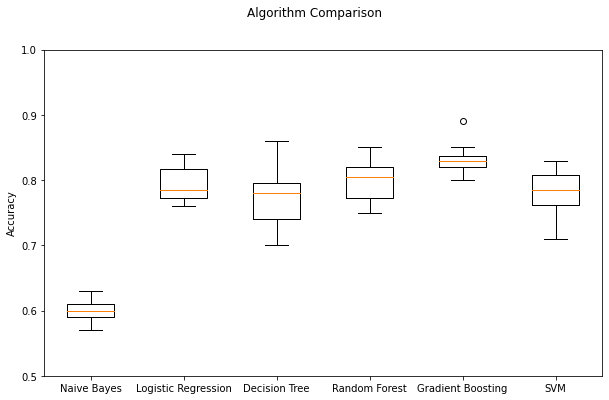

In [13]:
import matplotlib.pyplot as plt

results = [
           [0.61, 0.59, 0.6, 0.62, 0.58, 0.59, 0.61, 0.63, 0.57, 0.6 ],
           [0.79, 0.84, 0.82, 0.76, 0.78, 0.77, 0.83, 0.78, 0.77, 0.81],
           [0.78, 0.81, 0.73, 0.77, 0.7, 0.78, 0.86, 0.72, 0.8, 0.78],
           [0.78, 0.85, 0.75, 0.77, 0.76, 0.82, 0.84, 0.82, 0.79, 0.82],
           [0.82, 0.89, 0.83, 0.83, 0.81, 0.8, 0.84, 0.85, 0.82, 0.83],
           [0.82, 0.79, 0.71, 0.83, 0.77, 0.75, 0.81, 0.78, 0.76, 0.8] ]

columns=['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']

# boxplot algorithm comparison
fig = plt.figure( figsize=(10,6) )
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(columns)
ax.set_ylabel('Accuracy')
ax.set_ylim(0.5,1)
plt.show()

- These results suggest that both **Gradient Boosting** and **Random Forest classifiers** are worthy of further study on this problem.

- The score from the **Logistic Regression Classifier** is comparable with that of **Random forest Classifier**. And the score of **Decision Tree** is slightly lower, but comparable with that of **SVM**.

- The accuracy of the **Naive Bayes classifier** is the worst.

- Random Forest and Gradient Boosting are members of the **ensemble method**. They both are built from sets of decision trees. While random forest builds each tree independently, gradient boosting builds one tree at a time. While random forests combine results at the end of the process (by averaging or "majority votes"), gradient boosting combines results along the way.

- If carefully tuning parameters, gradient boosting can result in better performance than random forests in classification. However, gradient boosting may not be a good choice if a lot of noise presents in the data, as it can result in overfitting. They also tend to be harder to tune than random forests.

- Random forests perform well for multi-class object detection, which tends to have a lot of statistical noise. Gradient Boosting performs well for unbalanced data (unbalanced data refers to classification problems where we have unequal instances for different classes).

- Virtually any 'ensemble method' will do better than a simple Naive Bayes in classification.


- Random Forest is intrinsically suited for multiclass problems, while SVM is intrinsically good for two-class ones. For multiclass problem you may need to reduce it into multiple binary classification problems.

- Random Forest works well with a mixture of numerical and categorical features. When features are on the various scales, it is also fine. Roughly speaking, with Random Forest you can use data as they are

- SVM maximizes the "margin" and thus relies on the concept of "distance" between different points. It is up to you to decide if "distance" is meaningful. As a consequence, one-hot encoding for categorical features is a must-do. Further, min-max or other scaling is highly recommended at preprocessing step. **In this analysis, I should have done the one-hot encoding, however it takes long time to execute. I used Label-Encoding for the categorical features. So, one should one-hot encode the categorical features before training the models**.

- In Logistic Regression, features should be scaled and normalized unlike in Random Forest, they are unaffected. **Here, while performing the LR, I didn't scale and normalize the features. This should have affected the accuracy of the LR**.

# Conclusion

- I'd select Gradient Boosting and Random Forest classifiers for further consideration in this problem, since they obtained the best accuracy scores (80\%) when predicting the arrival delay.

- For other algorithms, it'd be better to scale and normalize data first since some algorithms are sensitive to it.

- Since the results also depend on the random state, we should use different values and keep the average accuracy for each machine learning algorithm.

- Use one-hot encoding for the categorical features.

- For complex or small datasets, if we have the resources, repeated k-fold cross validation is preferred.

- On very large datasets, a train-test split may be sufficient. I should use larger dataset (by including more data of years/months).